# Exploratory Data Analysis - Potato Chips Transactions 

![](https://i.pinimg.com/originals/88/73/77/887377d7f55c1177368b0589d91e4737.jpg)

## Sections

- Imports

- Data Preparation and Cleaning
    - Transactions Data
    - Customer Data
    - Merged Data - Customer & Transactions
        - Extracting Brand and Pack Size from PROD_NAME column
        - Checking for duplicates
        
- Data Exploration and Analysis - Customer Segments
    - Spending by each customer type
    
- Summary & Recommendations

## Imports
Importing necessary python libraries and creating a pandas dataframe for analysis.

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
customer = pd.read_csv('QVI_purchase_behaviour.csv')          #creating customer dataframe
transactions = pd.read_excel('QVI_transaction_data.xlsx')     #creating transactions dataframe

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

## Data Preparation and Cleaning


### Transactions Data

Overview of the transactions data.

In [3]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


There seem to be no missing values in the transactions data, however the DATE column is not in the correct data type and needs to be changed to datetime.

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


There seem to be no missing values in the transactions data, however the DATE column is not in the correct data type and needs to be changed to datetime.

In [5]:
dates = pd.TimedeltaIndex(transactions['DATE'], unit='d') + datetime.datetime(1900,1,1)
transactions.set_index(dates, inplace=True)
transactions.drop('DATE', axis='columns', inplace=True)
transactions.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

### Customer Data

Overview of the customer data.

In [6]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


The columns have the correct data types and there are no missing values.

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The unique values in the LIFESTAGE and PREMIUM_CUSTOMER column show that there are no anomalies.

In [8]:
print('Unique values in LIFESTAGE: \n{}'.format(customer['LIFESTAGE'].unique()), '\n')
print('Unique values in PREMIUM_CUSTOMER: \n{}'.format(customer['PREMIUM_CUSTOMER'].unique()))

Unique values in LIFESTAGE: 
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES'] 

Unique values in PREMIUM_CUSTOMER: 
['Premium' 'Mainstream' 'Budget']


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

### Merged Data - Customer & Transactions

Merging the customer and transactions data.

In [9]:
merged = transactions.merge(customer, on='LYLTY_CARD_NBR', how='outer').set_index(dates)
cond = merged['LYLTY_CARD_NBR'] == 1000
merged.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,
2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2019-05-22,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
2018-08-19,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
2018-08-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


#### Extracting Brand and Pack Size from *PROD_NAME* column

In [10]:
merged[['BRAND', 'PACK_SIZE']] =  merged['PROD_NAME'].str.extract(r'(^\D+)(\d+)', expand=True)
merged['PACK_SIZE'] = merged['PACK_SIZE'].astype(int)

In [11]:
merged['PACK_SIZE'].unique()

array([175, 160, 170, 150, 300, 165, 380, 330, 110, 210, 180, 200, 134,
       270, 220, 125,  70, 135, 250,  90, 190])

#### Checking for duplicates
The transactions below occured on two different dates and hence are not duplicates.

In [12]:
merged[merged.duplicated(keep=False)]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACK_SIZE
DATE,,,,,,,,,,,
2018-08-05,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium,Smiths Thinly Cut Roast Chicken,175
2018-10-02,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium,Smiths Thinly Cut Roast Chicken,175


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

## Data Exploration and Analysis - Customer Segments

### Spending by each customer type

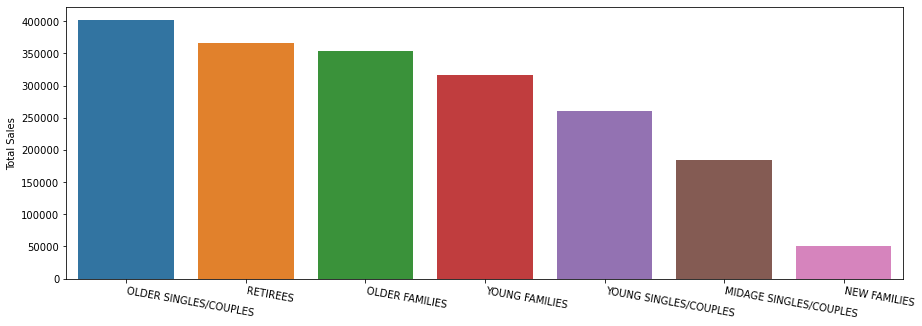

In [13]:
df = merged.groupby('LIFESTAGE').sum()['TOT_SALES'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=df.index, y=df.values)
xticks = plt.xticks(ha='left', rotation=-10)
xlabel = plt.xlabel('')
ylabel = plt.ylabel('Total Sales')

Older customers seem to spend a lot more than younger customers on chips. New families seem to spend considerably less probably because they have children or babies and need to pay more attention to their diet. The barplot suggests that excluding new families, we should target the rest.

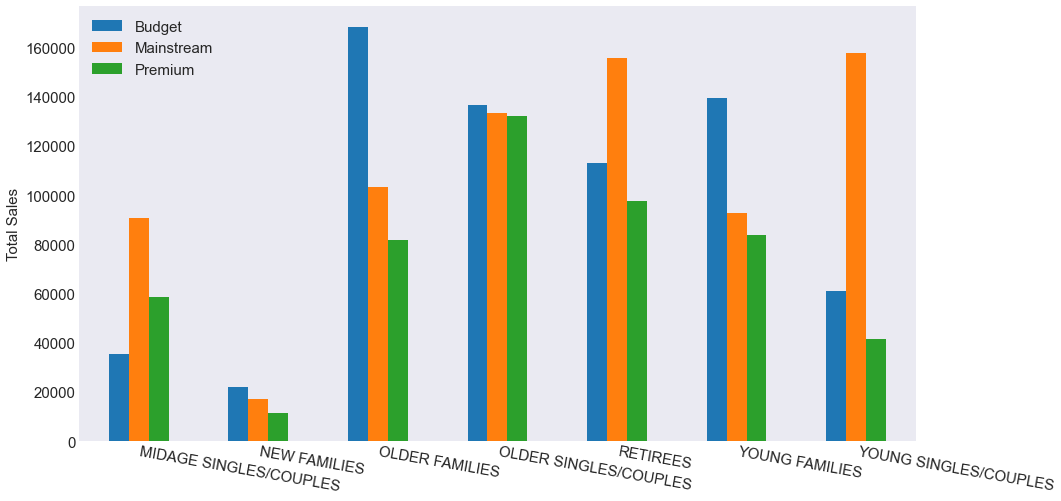

In [14]:
df= merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).sum()['TOT_SALES'].to_frame().unstack()
plt.rcParams.update({'font.size': 15})
plt.style.use('seaborn-dark')
df.plot(kind='bar', figsize=(15,8), fontsize=(15))
xticks = plt.xticks(ha='left', rotation=-10)
plt.legend(labels=['Budget', 'Mainstream', 'Premium'], fontsize='medium')
xlabel = plt.xlabel('')
ylabel = plt.ylabel('Total Sales')

Withing each lifestage group we can target the following subgroups: <a id='subgroup_exp'></a>
- MIDAGE SINGLES/COUPLES: Mainstream
- NEW FAMILIES: Budget
- OLDER FAMILIES: Budget
- OLDER SINGLE/COUPLES: Not much variation. So we could target all.
- RETIREES: Mainstream
- YOUNG FAMILIES: Budget
- YOUNG SINGLE/COUPLES: Mainstream

In [15]:
grouped = merged.groupby([pd.Grouper(freq='d'), 'LIFESTAGE', 'PREMIUM_CUSTOMER'])
df = grouped['TOT_SALES'].sum().to_frame().unstack([1, 2])

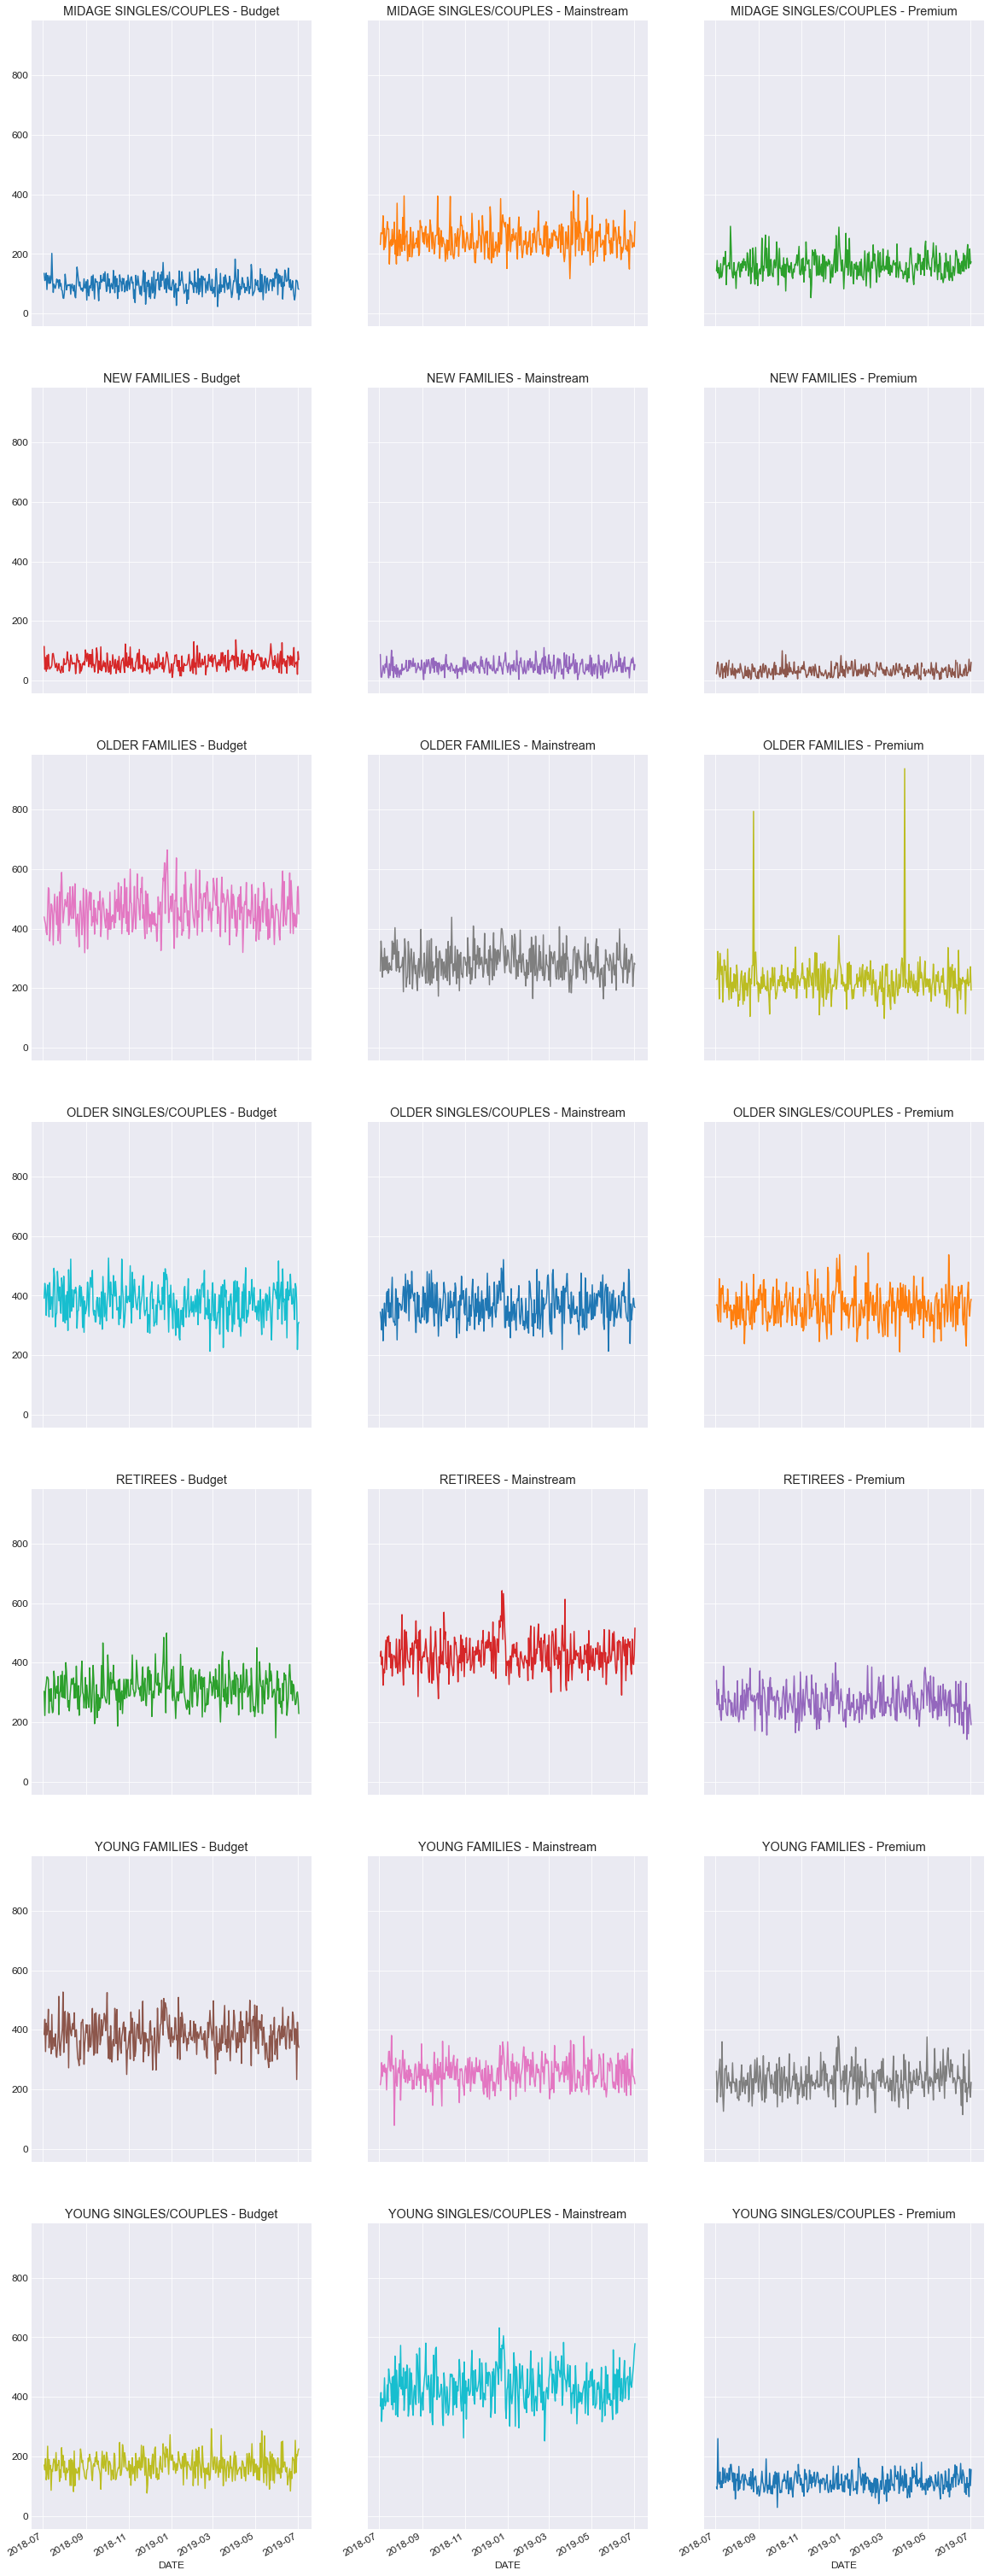

In [16]:
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 12})
title = [' - '.join(cols[1:]) for cols in df.columns]
ax = df.plot(subplots=True,layout=(7,3), figsize=(20, 60), sharey=True, grid=True, title=title, legend=False)

The spending range for all family subgroups is about the same over time, except for OLDER FAMILIES - Premium. There are two huge spikes in OLDER FAMILIES - Premium that are over 700 dollars. This needs to be further looked into.

In [17]:
df[df>700].dropna(axis='rows', how='all').dropna(axis='columns', how='all')

,TOT_SALES
LIFESTAGE,OLDER FAMILIES
PREMIUM_CUSTOMER,Premium
DATE,
2018-08-25,794.2
2019-03-29,937.8


Filtering the dataframe for sales over 700 shows that OLDER FAMILIES - Premium have spent during Christmas 2018 and on [Vietnam War Veterans Day, 2019](https://www.wincalendar.com/Holiday-Calendar/March-2019)

In [18]:
grouped = merged.groupby([pd.Grouper(freq='d'), 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR'])
df1 = grouped['PROD_QTY', 'TOT_SALES'].sum()
df1[df1>100].dropna()

,,,,PROD_QTY,TOT_SALES
DATE,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,,
2018-08-25,OLDER FAMILIES,Premium,226000,200.0,650.0
2019-03-29,OLDER FAMILIES,Premium,226000,200.0,650.0


Further inspection shows that only one particular customer with LYLTY_CARD_NBR - 226000 caused the sales spike on Christmas and Veterans day. We could probably target this customer on these two dates in the coming year to generate even more sales by providing exclusive offers for them [](#subgroup_exp)

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

## Summary & Recommendations

From the brief of analysis of the potato chips transactions we saw that older families spend more on chips. Within these family groups there are three subgroups - budget, mainstream and premium with varying expenditure in chips. We can target each subgroup on a case by case basis as shown in the plot above.

We saw that customer with LYLTY_CARD_NBR - 226000 spend way more than other customers on holidays. We could provide exclusive offers to this customer via email or text during holidays. This customer might then bring in more such customers.
<br></br>
<br></br>